# **Detecção de objetos com YoloV3 e a Darknet, utilizando Google Colab**

Esta implementação que uso com o Colab foi criada pelo https://www.youtube.com/@ArtificiallyIntelligents (ajidurrehman1@gmail.com) para um problema de detecção de armas em tempo real.

Aqui modifiquei elementos desta implementação para ela se aplicar ao dataset ExDark.

# **Montando o Drive**
Monte o Drive para editar e adicionar arquivos

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Para esta implementação precisaremos deste arquivos.


1. **custom_data/images** - diretório com as imagens e anotações.
2. **custom_data/custom.names** - arquivo que identifique as classes
3. **custom_data/train.txt** - arquivo que contém os caminhos das imagens de treino.
4. **custom_data/test.txt** - arquivo que contém os caminhos das imagens de teste
5. **custom_data/backup** - diretório que vai ser usado para guardar os pesos treinados
6. **custom_data/detector.data** - arquivo que contém informações úteis para o modelo
7. **custom_data/cfg** - arquivo de configuração do modelo

## *Criando o arquivo custom.names*
As labels utilizadas devem ser salvas em um arquivo custom.names.
Abaixo é o exemplo do arquivo para o treinamento com uma só classe.
As demais classes são adicionadas na linha seguinte, e assim por diante, com uma classe por linha.


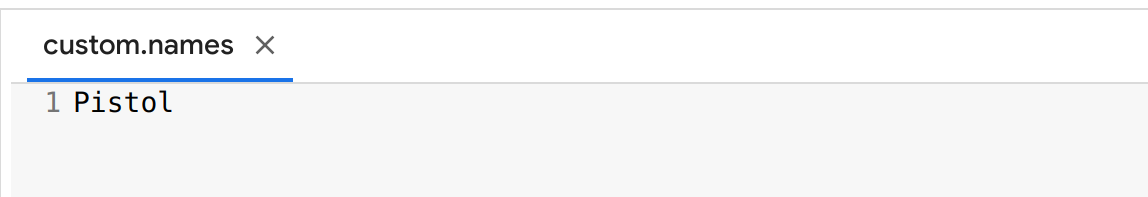

## *Creating Train and Test files*

Este é o código disponibilizado para a divisão das imagens no diretório images e criação dos dois arquivos train.txt e test.txt.

Podemos mudar a proporção, mas aqui usei 80% para treino e 20% para teste.

In [9]:
import os


# This function will create train.txt and test.txt files
def trainNtestFilesCreater(dataSetPath, mappingPath, train_size=0.80):
    listD = os.listdir(dataSetPath)
    # filtering the images
    images = [file for file in listD if file.split(".")[1] == "jpg"]
    print(images)
    # getting the training size
    trainS = int(len(images) * train_size)

    # creating txt files
    train = open("/content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/train.txt", "wt")
    test = open("/content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/test.txt", "wt")

    counter = 1
    for file in images:
        if counter <= trainS:
            # writing in train.txt file
            train.writelines(f"{mappingPath}/{file}\n")
            train.flush()
        else:
            # writing in text.txt file
            test.writelines(f"{mappingPath}/{file}\n")
            test.flush()
        counter += 1
    train.close()
    test.close()
    print(f"{counter} files processed")


# Path of the custom dataset which includes images along with its annotations
dataSetPath = r"/content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/images"
# provide the complete path of the drive you want to write in your train.txt file and test.txt fiel
mappingPath = "/content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/images"

# calling creater function to generate files
trainNtestFilesCreater(dataSetPath, mappingPath, train_size= 0.80)

['2015_00020.jpg', '2015_00059.jpg', '2015_00060.jpg', '2015_00070.jpg', '2015_00100.jpg', '2015_00103.jpg', '2015_00127.jpg', '2015_00129.jpg', '2015_00135.jpg', '2015_00160.jpg', '2015_00136.jpg', '2015_00161.jpg', '2015_00165.jpg', '2015_00180.jpg', '2015_00181.jpg', '2015_00182.jpg', '2015_00228.jpg', '2015_00262.jpg', '2015_00268.jpg', '2015_00302.jpg', '2015_00310.jpg', '2015_00318.jpg', '2015_00319.jpg', '2015_00320.jpg', '2015_00336.jpg', '2015_00385.jpg', '2015_00381.jpg', '2015_00383.jpg', '2015_00401.jpg', '2015_00429.jpg', '2015_00444.jpg', '2015_00485.jpg', '2015_00487.jpg', '2015_00491.jpg', '2015_00497.jpg', '2015_00498.jpg', '2015_00531.jpg', '2015_00533.jpg', '2015_00537.jpg', '2015_00539.jpg', '2015_00550.jpg', '2015_00574.jpg', '2015_00585.jpg', '2015_00592.jpg', '2015_00617.jpg', '2015_00618.jpg', '2015_00650.jpg', '2015_00651.jpg', '2015_00508.jpg', '2015_00509.jpg', '2015_00511.jpg', '2015_00502.jpg', '2015_00313.jpg', '2015_00142.jpg', '2015_00392.jpg', '2015_014

Abaixo é um exemplo de como um arquivo train.txt ou test.txt deve ficar após sua criação, com um caminho de imagem por linha.

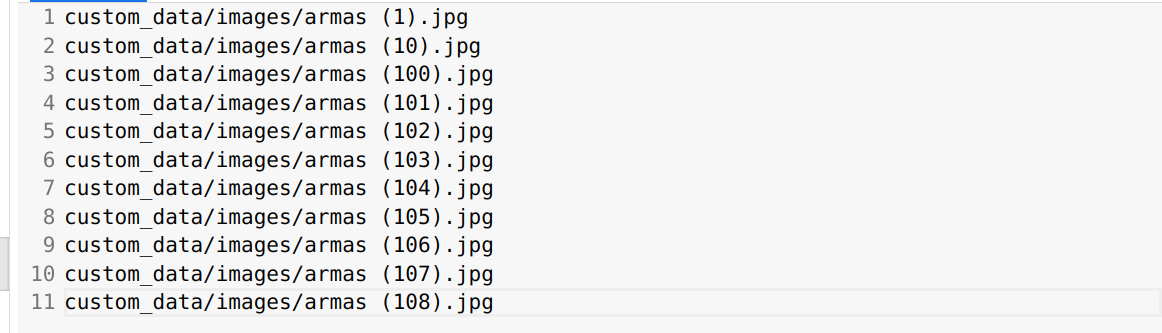

## *Crie o diretório 'Backup'*
Crie o diretório backup para guardar os pesos treinados do modelo.


## *Crie o arquivo detector.data*
Crie o arquivo 'detector.data' no diretório "custom_data" que contenha os caminhos para os arquivos:

treino.txt
teste.txt,
custom_names,
backup
e o número de classes.


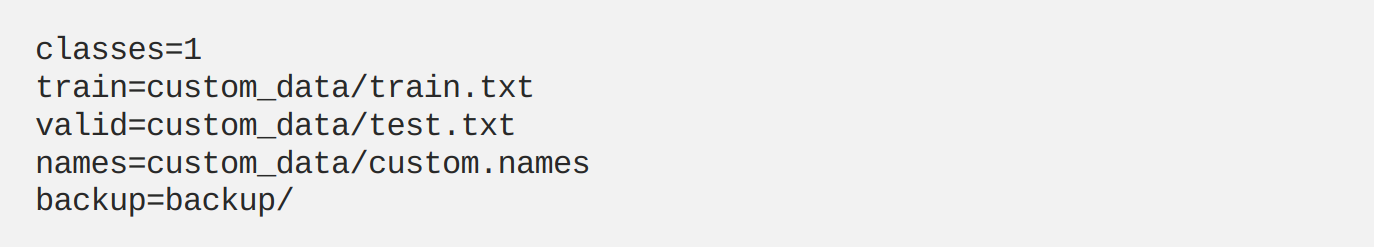

## *Clonar o diretório da Darknet*
Usaremos o framework da Darknet para treinar o detector. O código a seguir 'importa' a Darknet.

In [10]:
!git clone https://github.com/AlexeyAB/darknet

fatal: destination path 'darknet' already exists and is not an empty directory.


In [11]:
%cd darknet

/content/darknet



### Mudar alguns parâmetros para uma melhoria na velocidade de computação

In [12]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [13]:
# Make file
"/content/darknet/Makefile"

'/content/darknet/Makefile'

### Compilar o modelo



In [14]:
# compilando o modelo
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: wa

# Mudar o arquivo de configuração do yolov3
Aqui vou deixar a explicação original que visa detectar apenas uma classe, mas mudei o arquivo .cfg de acordo com a minha quantia de classes como foi recomendado aqui.
## *Making changes in the yolo Configuration file*
We can choose the YOLOv3 configuration file based on the performance that is necessary. **Yolov3.cfg** will be used in this example. The file from **darknet/cfg/yolov3.cfg** can be copied to **custom data/cfg/yolov3-custom.cfg**.

_

The neural network weights are iteratively adjusted as the images are trained. We may use large training sets, making it resource-intensive to update the weights for the full training set in a single cycle. The **batch** parameter is specified to utilise a small set of images to iteratively update the weights. It is initially set at 64.

_

The parameter **max batches** determines the maximum number of iterations for which our network should be trained. You can calculate its value with the formula **max_batches = classes*2000**, i.e. **2000** for a single class, and modify the line steps to **80%** and **90%** of max batches, which is **1600,1800**.

when the model reaches to **2000 epochs** during training for 1 class, it will stop the training, because we defined that in our max_batches parameter, if you want to train your model beyound from that, increase the value of max_batches, and also increase its steps, like when you change the value to **max batches=6000**, modify the line steps to **80%** and **90%** of max batches, i.e. steps=4800,5400.  

--

The **classes** and **filters** parameters of the [yolo] and [convolutional] layers immediately preceding the [yolo] layers must be updated.


Since there is just one class in this project (Pistol), we will update the class parameter in the [yolo] layers to **1** at lines **610, 696, and 783**.

The **filters** parameter will also need to be updated based on the classes count: **filters=(classes + 5) * 3**. We should set **filters=18** for a single class at **line numbers: 603, 689, 776**.

Custom data/cfg/yolov3-custom.cfg contains all configuration changes.


## *Baixando pesos pré-treinados da Darknet*
Para treinar o nosso modelo, usaremos pesos pré-treinados que estão disponíveis [aqui](https://pjreddie.com/media/files/darknet53.conv.74).

O comando abaixo também pode ser usado para baixar tais pesos.

In [8]:
# baixando pesos pré-treinados da darknet
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2023-12-25 22:43:21--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  50.0MB/s    in 3.2s    

2023-12-25 22:43:24 (47.7 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## *Treinando o modelo*
Agora que temos todos os arquivos e diretórios necessários, podemos começar o treinamento.
O código abaixo utiliza o métodod train da darknet, passando o caminho do arquivo detector.data, yolov3-custom.cfg e os pesos que acabamos de baixar.

In [16]:
!./darknet detector train /content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/detector.data /content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/cfg/yolov3-custom.cfg /content/darknet/darknet53.conv.74 -dont_show

A saída de streaming foi truncada nas últimas 5000 linhas.
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.692885), count: 6, class_loss = 1.417091, iou_loss = 0.668167, total_loss = 2.085257 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.661495), count: 9, class_loss = 2.242623, iou_loss = 1.186538, total_loss = 3.429161 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.019948, iou_loss = 0.000000, total_loss = 0.019948 
 total_bbox = 972779, rewritten_bbox = 0.231193 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.730742), count: 6, class_loss = 0.965723, iou_loss = 0.476645, total_loss = 1.442367 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.723099), count: 3, class_loss = 0.511032, iou_loss = 0.209445, total_loss = 0.720476 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, 

## *Continuar a treinar depois de uma parada*
Caso algum problema do colab aconteça e a seção seja descontinuada, rode o código abaixo no lugar do de cima. Assim, o treinamento irá apenas continuar do último peso salvo no diretório backup.

In [11]:
!./darknet detector train /content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/detector.data /content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/cfg/yolov3-custom.cfg /content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/backup/yolov3-custom_last.weights -dont_show

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
yolov3-custom
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 

## *Calculando as métricas de resultado*
Passando o caminho do arquivo detector.data, yolov3-custom.cfg e os últimos pesos (ou qualquer peso preferido) no código abaixo, temos um retorno de métricas de acurácia por cada classe.

In [15]:
!./darknet detector map /content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/detector.data /content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/cfg/yolov3-custom.cfg /content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/backup/yolov3-custom_last.weights -dont_show

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.5.4
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.59

# Teste Visual

Aqui faremos um teste visual com um vídeo e salvaremos o vídeo resultante.

In [2]:
import cv2
import numpy as np

In [12]:
import cv2
import numpy as np

cap = cv2.VideoCapture("/content/gdrive/MyDrive/TrabalhoFinal_Visão/teste_vid/vid1.mp4")
wht = 320
confThreshold = 0.5
nmsThreshold = 0.3
classNames = ["Bicycle", "Boat", "Bottle", "Bus", "Car", "Cat", "Chair", "Cup", "Dog", "Motorbike", "People", "Table"]
modelConfiguration = "/content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/cfg/yolov3-custom.cfg"
modelWeights = "/content/gdrive/MyDrive/TrabalhoFinal_Visão/Dataset_ExDark/Custom_data/backup/yolov3-custom_last.weights"
net = cv2.dnn.readNetFromDarknet(modelConfiguration, modelWeights)
net.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
net.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)

# Parâmetros para salvar o vídeo
output_file = "/content/gdrive/MyDrive/TrabalhoFinal_Visão/teste_vid/out_vids/out_vid1.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
fps = cap.get(cv2.CAP_PROP_FPS)
width, height = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
video_writer = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

while cap.isOpened():
    success, frame = cap.read()
    if not success:
        break

    blob = cv2.dnn.blobFromImage(frame, 1 / 255, (wht, wht), [0, 0, 0], swapRB=True, crop=False)
    net.setInput(blob)
    outputLayersNames = net.getUnconnectedOutLayersNames()
    outputs = net.forward(outputLayersNames)
    findObjects(outputs, frame)

    # Escreva o frame modificado no arquivo de vídeo
    video_writer.write(frame)

# Libere recursos
cap.release()
video_writer.release()
cv2.destroyAllWindows()

